# **1-------------------------------------------------------------**

 1 **Realizar un modelo polinómico entre 2 variables numéricas de la data Breast Cancer.csv, utilizar los conocimientos acumulados al momento para escoger las 2 variables para el modelo X e y, hacer el plot de las variables, dividir data entre test y train, ajustar el grado del polinomio al mayor posible sin llegar al overfit, crear métricas de bondad de ajuste y porque elegiste esas (MAE, MSE)**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sb
from __future__ import print_function
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Leer el archivo csv
ruta = "https://raw.githubusercontent.com/AnthonyE11/Pandas/main/Breast_Cancer.csv"
data = pd.read_csv(ruta)

In [3]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
#verificamos datos
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

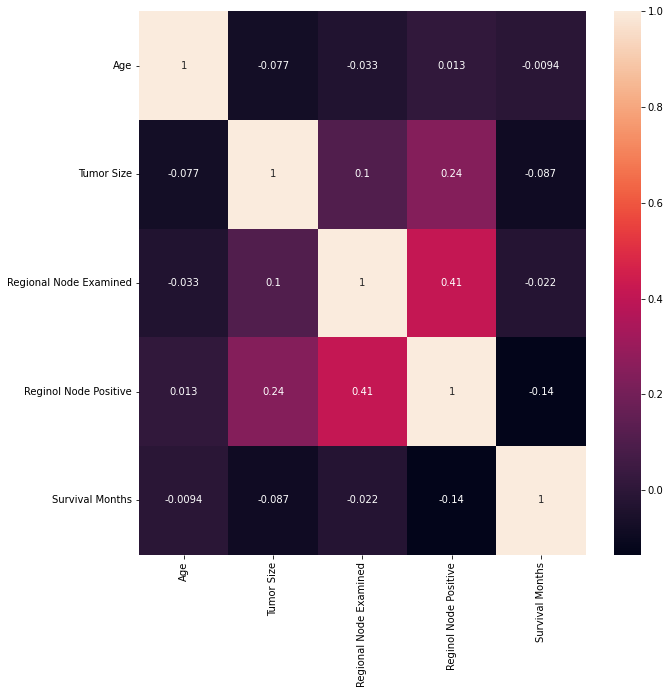

In [5]:
from scipy.stats import pearsonr
import seaborn as sb
pearson=data.corr(method="pearson")
pearson
plt.figure(figsize=(10,10))
sb.heatmap(pearson, annot=True)
plt.show()


In [6]:
# Elegir las variables para el modelo X e y
x = data.drop(columns=['Reginol Node Positive'])
y = data['Reginol Node Positive']

In [7]:
# Evaluamos
x.shape

(4024, 15)

In [8]:
y.shape

(4024,)

In [9]:
y = y.values.reshape(-1,1)
y.shape

(4024, 1)

In [10]:
# Verificamos que datos son categoricos y cuales numericos.
print(data.dtypes)

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object


In [11]:
data = data.select_dtypes(exclude=['object'])

In [12]:
# Verificamos como quedo la data
print(data.dtypes)

Age                       int64
Tumor Size                int64
Regional Node Examined    int64
Reginol Node Positive     int64
Survival Months           int64
dtype: object


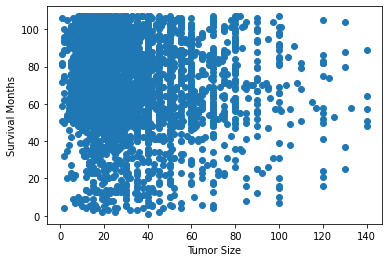

In [13]:
X = data['Tumor Size']
y = data['Survival Months']
plt.scatter(X, y)
plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
degrees = np.arange(1, 15)
train_scores, test_scores = [], []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train[:, np.newaxis])
    X_poly_test = poly.transform(X_test[:, np.newaxis])
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    train_scores.append(lin_reg.score(X_poly_train, y_train))
    test_scores.append(lin_reg.score(X_poly_test, y_test))
    
best_degree = np.argmax(test_scores) + 1
print('Best degree:', best_degree)

<ipython-input-15-f00fbfbe2917>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_poly_train = poly.fit_transform(X_train[:, np.newaxis])
<ipython-input-15-f00fbfbe2917>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_poly_test = poly.transform(X_test[:, np.newaxis])
<ipython-input-15-f00fbfbe2917>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_poly_train = poly.fit_transform(X_train[:, np.newaxis])
<ipython-input-15-f00fbfbe2917>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert 

Best degree: 4


<ipython-input-15-f00fbfbe2917>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_poly_test = poly.transform(X_test[:, np.newaxis])


In [16]:
poly = PolynomialFeatures(degree=best_degree)
X_poly_train = poly.fit_transform(X_train[:, np.newaxis])
X_poly_test = poly.transform(X_test[:, np.newaxis])

lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

<ipython-input-16-d541c369717b>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_poly_train = poly.fit_transform(X_train[:, np.newaxis])
<ipython-input-16-d541c369717b>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_poly_test = poly.transform(X_test[:, np.newaxis])


LinearRegression()

MAE y MSE son medidas para evaluar la precisión de un modelo de regresión. MAE es más fácilmente interpretable, mientras que MSE penaliza más los errores grandes que los errores pequeños. La elección que se tuvo fue tomada tomando estas condiciones.

In [20]:
y_pred_train = lin_reg.predict(X_poly_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('Train MAE:', mae_train)
print('Train MSE:', mse_train)

y_pred_test = lin_reg.predict(X_poly_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Test MAE:', mae_test)
print('Test MSE:', mse_test)

Train MAE: 18.59223016164405
Train MSE: 523.0194841485512
Test MAE: 18.466569392956163
Test MSE: 512.2610939717306


#**2----------------------------------------------------------**

2 **Crear un árbol de clasificación para predecir la variable categórica binario de status (y_target), crear una matriz de confusión , métricas de bondad (score, recall, precision),  partición train y test.
Crear el importance_features y determinar cuales son las 2 mejores características del árbol.**


In [21]:
#Avanzamos un poco como la anterior pregunta

In [22]:
data = pd.read_csv(ruta)

In [23]:
# Elegir las variables para el modelo X e y
x = data.drop(columns=['Status'])
y = data['Status']

In [24]:
x.shape

(4024, 15)

In [25]:
y.shape

(4024,)

In [26]:
y = y.values.reshape(-1,1)
y.shape

(4024, 1)

In [27]:
# Verificamos que datos son categoricos y cuales numericos.
print(data.dtypes)

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object


In [28]:
# Codificar variables categóricas utilizando one-hot encoding
X_encoded = pd.get_dummies(x, columns=['Race'])

In [29]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [30]:
# Crear modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

In [31]:
# Codificar las variables categóricas en los datos
X_encoded = pd.get_dummies(x)

In [32]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [33]:
# Crear un modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

In [34]:
# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

In [36]:
# Calcular la matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

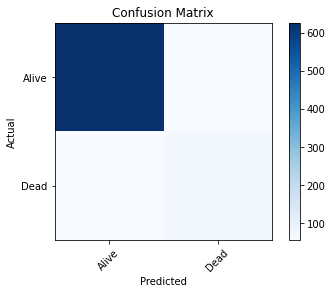

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=["Alive", "Dead"])
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(["Alive", "Dead"]))
plt.xticks(tick_marks, ["Alive", "Dead"], rotation=45)
plt.yticks(tick_marks, ["Alive", "Dead"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[627,  58],
       [ 55,  65]])

In [39]:
cm = confusion_matrix(y_test,y_pred,normalize='true')
cm

array([[0.91532847, 0.08467153],
       [0.45833333, 0.54166667]])

In [40]:
# Calcular las métricas de bondad del modelo

score = accuracy_score(y_test, y_pred)
labels = ["Alive", "Dead"]
recall = recall_score(y_test, y_pred, average='binary', pos_label="Dead", labels=labels)
precision = precision_score(y_test, y_pred, average='binary', pos_label="Dead", labels=labels)

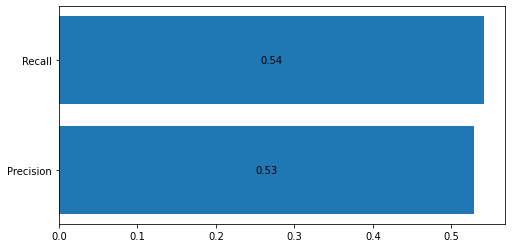

In [41]:
import matplotlib.pyplot as plt

# Calcular las métricas de bondad del modelo
score = accuracy_score(y_test, y_pred)
labels = ["Alive", "Dead"]
recall = recall_score(y_test, y_pred, average='binary', pos_label="Dead", labels=labels)
precision = precision_score(y_test, y_pred, average='binary', pos_label="Dead", labels=labels)

# Crear una figura
fig, ax = plt.subplots(figsize=(8, 4))

# Agregar barras horizontales para la precisión y el recall
ax.barh(['Precision', 'Recall'], [precision, recall])

# Ajustar la etiqueta del eje y
ax.set_yticks(['Precision', 'Recall'])
ax.set_yticklabels(['Precision', 'Recall'])

# Agregar etiquetas a las barras
ax.text(precision/2, 0, '{:.2f}'.format(precision), ha='center', va='center')
ax.text(recall/2, 1, '{:.2f}'.format(recall), ha='center', va='center')

# Mostrar el gráfico
plt.show()

In [42]:
# Obtener la importancia de cada variable en el modelo
feature_importances = clf.feature_importances_

In [43]:
# Obtener los nombres de las variables
feature_names = X_encoded.columns

In [44]:
# Crear un DataFrame con la importancia de cada variable
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

In [45]:
# Ordenar el DataFrame por importancia descendente
importance_df = importance_df.sort_values('importance', ascending=False)

In [46]:
# Obtener las dos variables más importantes
top_2_features = importance_df.head(2)['feature'].values

In [47]:
# Imprimir las métricas de bondad del modelo y las variables más importantes
print(f'Score: {score}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'Top 2 features: {top_2_features}')

Score: 0.8596273291925466
Recall: 0.5416666666666666
Precision: 0.5284552845528455
Top 2 features: ['Survival Months' 'Age']


# **3--------------------------------------------------------------------**

3 **Con las 2 mejores características sugeridas por el árbol, crear una regresión logistica para predecir el status.
Crear la matriz de confusión , métricas división de test y train , estandarización previa.**


In [48]:
# Crear la matriz de características y el vector de etiquetas
X = data[['Tumor Size', 'Reginol Node Positive']].values
y = data['Status'].values

In [49]:
# Crear el árbol de decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [50]:
# Obtener las importancias de las características
importances = tree.feature_importances_
print('Importances:', importances)

Importances: [0.53984573 0.46015427]


In [51]:
# Seleccionar las dos mejores características
best_features = np.argsort(importances)[-2:]
print('Best features:', best_features)

Best features: [1 0]


In [52]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# Estandarizar los datos de entrenamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [57]:
# Crear la regresión logística y ajustarla a los datos de entrenamiento
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [58]:
# Estandarizar los datos de prueba
X_test = scaler.transform(X_test)

In [59]:
# Hacer predicciones en los datos de prueba y calcular las métricas de evaluación
y_pred = log_reg.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Alive')
recall = recall_score(y_test, y_pred, pos_label='Alive')
f1 = f1_score(y_test, y_pred, pos_label='Alive')

print('Confusion matrix:\n', confusion)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Confusion matrix:
 [[675  10]
 [114   6]]
Precision: 0.8555133079847909
Recall: 0.9854014598540146
F1-score: 0.9158751696065128


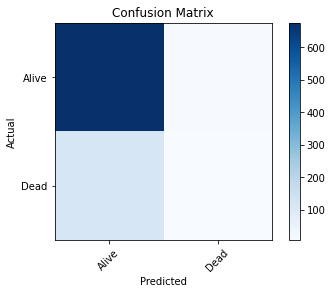

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=["Alive", "Dead"])
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(["Alive", "Dead"]))
plt.xticks(tick_marks, ["Alive", "Dead"], rotation=45)
plt.yticks(tick_marks, ["Alive", "Dead"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[675,  10],
       [114,   6]])